# Homework 5: Neural Networks for Recognition

#### **For each question please refer to the handout for more details.**

Programming questions begin at **Q2**. **Remember to run all cells** and save the notebook to your local machine as a pdf for gradescope submission.


# Collaborators
**List your collaborators for all questions here**:


---

# Q1 Theory


## Q1.1 (3 points)


Softmax is defined as below, for each index $i$ in a vector $x \in \mathbb{R}^d$.
$$ softmax(x)_i = \frac{e^{x_i}}{\sum_j e^{x_j}} $$
Prove that softmax is invariant to translation, that is
$$ softmax(x) = softmax(x + c) \quad \forall c \in \mathbb{R}.$$    
Often we use $c = -\max x_i$. Why is that a good idea? (Tip: consider the range of values that numerator will have with $c=0$ and $c = -\max x_i$)

---
$$
\mathrm{softmax}(x + c)_i 
= \frac{e^{(x_i + c)}}{\sum_{j=1}^d e^{(x_j + c)}} 
= \frac{e^c \, e^{x_i}}{e^c \sum_{j=1}^d e^{x_j}}
= \frac{e^{x_i}}{\sum_{j=1}^d e^{x_j}}
= \mathrm{softmax}(x)_i.
$$

Therefore, $(\mathrm{softmax}(x + c) = \mathrm{softmax}(x))$.

---

**Why is** $(c = - \max_i x_i)$ **a good idea?**

We generally subtract the maximum value among the components of $(x)$ to stabilize numerical computations. By setting $(c = - \max_i x_i)$ the largest exponent becomes $( e^0 = 1)$. This avoids potentially large or very small exponent values.

---

## Q1.2

Softmax can be written as a three-step process, with $s_i = e^{x_i}$, $S = \sum s_i$ and $softmax(x)_i = \frac{1}{S} s_i$.

### Q1.2.1 (1 point)

As $x \in \mathbb{R}^d$, what are the properties of $softmax(x)$, namely what is the range of each element? What is the sum over all elements?

---
**Range**
$(0 < \mathrm{softmax}(x)_i < 1)$

**Sum**
As softmax is the probability vector of all possible outcomes of the model, due to the law of probabilities the sum over all the elements is 1

---

### Q1.2.2 (1 point)

One could say "softmax takes an arbitrary real valued vector $x$ and turns it into a $(\rule{3cm}{0.1mm})$".

---

Probability distribution/vector

---

### Q1.2.3 (1 point)

Now explain the role of each step in the multi-step process.

---

- **Step 1** $( s_i = e^{x_i})$: Exponentiating each component so all components are positive and nonzero.
- **Step 2** $( S = \sum_i s_i )$: Sum up all the exponentiated values to get a normalization constant.
- **Step 3** $( \mathrm{softmax}(x)_i = s_i / S)$: Divide each term by the sum so that the resulting vector sums to 1 and each component is between 0 and 1.

---

## Q1.3 (3 points)

Show that multi-layer neural networks without a non-linear activation function are equivalent to linear regression.




---

If we have multi-layer neural network with $(L)$ layers. and each layer in the set of layers performs the linear transformation:

$$
z^{(\ell)} = W^{(\ell)}\,z^{(\ell - 1)} + b^{(\ell)},
$$

where $( z^{(0)} = x)$ is the input, $( W^{(\ell)} )$ is a weight matrix, and $( b^{(\ell)} )$ is a bias vector. 

- No non-linear activation means each layer is just a linear map. 
- A composition of linear functions is still just a linear function.

Explicitly, for \(L\) layers (no activation in between):

$$
z^{(1)} = W^{(1)} x + b^{(1)}, \quad
z^{(2)} = W^{(2)} z^{(1)} + b^{(2)} = W^{(2)} \bigl(W^{(1)} x + b^{(1)}\bigr) + b^{(2)},
$$
and so on in the set of layers

Ultimately, you can rewrite the final output $( z^{(L)} $) as
$$
z^{(L)} = W' \, x + b',
$$
where $(W')$ and $(b')$ absorb all the substitutions, multiplications, and additions of the layers which is still ultimatley just a linear regression.


---

## Q1.4 (3 points)

Given the sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$, derive the gradient of the sigmoid function and show that it can be written as a function of $\sigma(x)$ (without having access to $x$ directly).

---
$$
\sigma(x) 
= \frac{1}{1 + e^{-x}}.
$$

Compute the derivative:

$$
\sigma'(x)
= \frac{d}{dx} \left( \frac{1}{1 + e^{-x}} \right).
$$

First rewrite $\sigma(x)$:
$$
\sigma(x) = (1 + e^{-x})^{-1}.
$$

Apply the chain rule:

$$
\sigma'(x)
= -(1 + e^{-x})^{-2} \cdot \frac{d}{dx}(1 + e^{-x})
= -(1 + e^{-x})^{-2} \cdot \bigl(-e^{-x}\bigr)
= \frac{e^{-x}}{(1 + e^{-x})^2}.
$$

Then you see that:
$$
\frac{e^{-x}}{(1 + e^{-x})^2}
= \frac{1}{1 + e^{-x}} \; \frac{e^{-x}}{1 + e^{-x}}
= \sigma(x) \bigl(1 - \sigma(x)\bigr).
$$

So:

$$
\sigma'(x) 
= \sigma(x)\bigl(1 - \sigma(x)\bigr).
$$



---

## Q1.5 (12 points)

Given $y = Wx + b$ (or $y_i = \sum_{j=1}^d  x_{j} W_{ij} + b_i$), and the gradient of some loss $J$ (a scalar) with respect to $y$, show how to get the gradients $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$. Be sure to do the derivatives with scalars and re-form the matrix form afterwards. Here are some notional suggestions.
$$ x \in \mathbb{R}^{d \times 1} \quad y \in \mathbb{R}^{k \times 1} \quad W \in \mathbb{R}^{k \times d} \quad b \in \mathbb{R}^{k \times 1} \quad \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{k \times 1} $$

---
Start with $y=Wx+b$ is the forward pass, then let
$$
y_i = \sum_{j=1}^d W_{ij}\,x_j \;+\; b_i,
$$
where $( i = 1, \ldots, k)$.

And $(\delta_i = \tfrac{\partial J}{\partial y_i})$

1. **$(\tfrac{\partial J}{\partial x_j})$**:
$$
\frac{\partial J}{\partial x_j} 
= \sum_{i=1}^k \frac{\partial J}{\partial y_i} \frac{\partial y_i}{\partial x_j}.
$$
And
$$
\frac{\partial y_i}{\partial x_j} = \frac{\partial}{\partial x_j} 
\Bigl(\sum_{p=1}^d W_{ip}\,x_p + b_i\Bigr)
= W_{ij}.
$$

So
$$
\frac{\partial J}{\partial x_j}
= \sum_{i=1}^k \delta_i \, W_{ij}.
$$

2. $\tfrac{\partial J}{\partial W_{ij}}$:
$$
\frac{\partial J}{\partial W_{ij}} 
= \sum_{m=1}^k \frac{\partial J}{\partial y_m} \frac{\partial y_m}{\partial W_{ij}}.
$$

And 
$$
\frac{\partial y_m}{\partial W_{ij}} 
= \frac{\partial}{\partial W_{ij}}\Bigl(\sum_{p=1}^d W_{mp}\,x_p + b_m\Bigr)
= 
\begin{cases}
x_j & \text{if } m = i,\\
0   & \text{if } m \neq i,
\end{cases}
$$

So 
$$
\frac{\partial y_m}{\partial W_{ij}} = x_j \delta_{mi} 
$$
which means that 
$$
\frac{\partial J}{\partial W_{ij}} 
= \sum_{m=1}^k \delta_m \, x_j \, \delta_{mi}
= \delta_i \, x_j.
$$

3. $\tfrac{\partial J}{\partial b_i}$:

$$
\frac{\partial J}{\partial b_i} 
= \sum_{m=1}^k \frac{\partial J}{\partial y_m} \frac{\partial y_m}{\partial b_i}.
$$
And
$$
\frac{\partial y_m}{\partial b_i}
= 
\begin{cases}
1 & \text{if } m = i,\\
0 & \text{otherwise},
\end{cases}
$$
so
$$
\frac{\partial J}{\partial b_i} 
= \sum_{m=1}^k \delta_m \,\delta_{mi} 
= \delta_i.
$$

### 2. Matrix/Vector Form

Let $(\delta \in \mathbb{R}^{k \times 1})$ be the vector whose $(i)-th$ entry is $(\delta_i)$.

1. **Gradient w.r.t. $(b)$**

   In vector form:
   $$
   \frac{\partial J}{\partial b} = \delta.
   $$

2. **Gradient w.r.t. $(x)$**

   From the index result $\frac{\partial J}{\partial x_j} = \sum_{i=1}^k \delta_i W_{ij}$, we can see that
   $$
   \frac{\partial J}{\partial x}
   = W^\top \,\delta.
   $$
   For the matrices, $(W^\top$) is ${d\times k}$, $(\delta)$ is ${k\times 1}$, so the product is ${d\times 1}$.

3. **Gradient w.r.t. $(W)$**

   From the index result $\frac{\partial J}{\partial W_{ij}} = \delta_i x_j$, we recognize this is the outer product. Hence:
   $$
   \frac{\partial J}{\partial W}
   = \delta \, x^\top,
   $$
   For the matrices $(\delta)$ is ${k\times 1}$, $(x^\top)$ is ${1\times d}$, giving a ${k\times d}$ matrix.

Putting it all together:

$$
\boxed{
\frac{\partial J}{\partial b} = \delta,
\quad
\frac{\partial J}{\partial x} = W^\top \delta,
\quad
\frac{\partial J}{\partial W} = \delta \, x^\top.
}
$$

at respective dimesions of 
$$
\boxed{
{k\times 1},
\quad
{d\times 1},
\quad
{k\times d}
}
$$





---

## Q1.6
When the neural network applies the elementwise activation function (such as sigmoid), the gradient of the activation function scales the backpropagation update. This is directly from the chain rule, $\frac{d}{d x} f(g(x)) = f'(g(x)) g'(x)$.

### Q1.6.1 (1 point)

Consider the sigmoid activation function for deep neural networks. Why might it lead to a "vanishing gradient" problem if it is used for many layers (consider plotting the gradient you derived in Q1.4)?



---

The sigmoid function $(\sigma(x) = \tfrac{1}{1 + e^{-x}}$ with its gradient
$$
\sigma'(x) \;=\; \sigma(x)\,\bigl(1 - \sigma(x)\bigr)
$$
could lead to vanishing gradients for the following reasons:


1. With equality only at $x=0$, for values of $x$$ far from zero $\sigma'(x)$ can be very small.

2. **Chain Rule Amplification**:

In a deep neural network with multiple sigmoid layers. If each layer contributes a factor of \(\sigma'(x)\) during backpropagation, then the overall gradient passed to the earlier layers is the product of many terms. The product can quickly shrink to **near zero** as $$L$ grows. That is how “vanishing” gradients arise.

3. **Saturation Regions**:

   For inputs $( x \ll 0 )$ or $( x \gg 0 )$, the sigmoid $\sigma(x)$ saturates near $0$ or $1$, respectively. In these regions, its gradient $\sigma'(x)$ is extremely small. Therefore, any neuron that becomes saturated will yield little to no gradient flow back through that path, further exacerbating the vanishing gradient issue.

---

### Q1.6.2 (1 point)
Often it is replaced with $\tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$. What are the output ranges of both $\tanh$ and sigmoid? Why might we prefer $\tanh$?

---

1. **Output Ranges:**
   - **Sigmoid** $\sigma(x)$:
     $$
     0 < \sigma(x) < 1.
     $$

   - **Tanh** $\tanh(x)$:
     $$
     -1 < \tanh(x) < 1.
     $$

Both are asymptotic.

2. **Why might we prefer %\tanh%?**:

The main advantage is that $\tanh$ is **zero-centered** due to it's asymptotic outputs being from -1 to 1. This often helps with optimization when doing gradient-based training because the average of activations can stay closer to zero, which tends to make the distribution of activations and gradients more stable.  

By contrast, sigmoid's outputs being only from 0 to 1 can lead to a bias of all positive neurons. This can sometimes slow convergence or make training more difficult.

---

### Q1.6.3 (1 point)
Why does $\tanh(x)$ have less of a vanishing gradient problem? (plotting the gradients helps! for reference: $\tanh'(x) = 1 - \tanh(x)^2$)

---

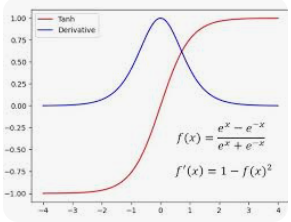

This is an example plot above taken from the internet, but we can of the gradient (derivative) above that we can still get 1 at $x=0$ so the gradient is larger and backpropagated errors do not shrink as quickly. 

---

### Q1.6.4 (1 point)
$\tanh$ is a scaled and shifted version of the sigmoid. Show how $\tanh(x)$ can be written in terms of $\sigma(x)$.

---

$$
\tanh(x) 
= \frac{e^x - e^{-x}}{\,e^x + e^{-x}\,}.
$$

Factor out \(e^x\) from numerator and denominator:

$$
\tanh(x)
= \frac{e^x\bigl(1 - e^{-2x}\bigr)}{e^x\bigl(1 + e^{-2x}\bigr)}
= \frac{1 - e^{-2x}}{1 + e^{-2x}}.
$$

Recall the sigmoid
$$
\sigma(x) 
= \frac{1}{1 + e^{-x}}.
$$

So, for $2x$,
$$
\sigma(2x) 
= \frac{1}{1 + e^{-2x}} 
\quad\Longrightarrow\quad
\tanh(x) 
= 2\,\sigma(2x) \;-\; 1.
$$

And you can see that tanh is a scaled and shifted sigmoid

$$
\tanh(x) = 2\,\sigma(2x) \;-\; 1.
$$

---


# Q2 Implement a Fully Connected Network

Run the following code to import the modules you'll need. When implementing the functions in Q2, make sure you run the test code (provided after Q2.3) along the way to check if your implemented functions work as expected.

In [56]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches
from mpl_toolkits.axes_grid1 import ImageGrid

import skimage
import skimage.measure
import skimage.color
import skimage.restoration
import skimage.filters
import skimage.morphology
import skimage.segmentation
import random

## Q2.1 Network Initialization

### Q2.1.1 (3 points)

Why is it not a good idea to initialize a network with all zeros? If you imagine that every layer has weights and biases, what can a zero-initialized network output be after training?

---

Initializing a network with all zeros means that both the forward pass and backprop are identical, and the network will never change so it's just stuck.

---

### Q2.1.2 (3 points)

Implement the initialize_weights() function to initialize the weights for a single layer with Xavier initialization, where $Var[w] = \frac{2}{n_{in}+ n_{out}} $ where $n$ is the dimensionality of the vectors and you use a uniform distribution to sample random numbers (see eq 16 in [Glorot et al]).

In [21]:
############################## Q 2.1.2 ##############################
def initialize_weights(in_size,out_size,params,name=''):
    """
    we will do XW + b, with the size of the input data array X being [number of examples, in_size]
    the weights W should be initialized as a 2D array
    the bias vector b should be initialized as a 1D array, not a 2D array with a singleton dimension
    the output of this layer should be in size [number of examples, out_size]
    """
    W, b = None, None

    ##########################
    ##### your code here #####
    ##########################

    # from Var[w] = 2 / (n_in + n_out), uniform distribution
    limit = np.sqrt(6.0 / (in_size + out_size))  
    W = np.random.uniform(-limit, limit, size=(in_size, out_size))
    b = np.zeros(out_size)  # bias initialized to 0

    params['W' + name] = W
    params['b' + name] = b

### Q2.1.3 (2 points)

Why do we scale the initialization depending on layer size (see Fig 6 in the [Glorot et al])?

---

Because we want to keep the variance of the outputs at a manageable scale as data flows forward and backward through multiple layers. If weights are too large or too small relative to the input/output dimensions, the signals can explode or vanish. By scaling initialization according to the layer’s input and output size, Xavier initialization attempts to keep the variance of activations roughly constant across layers, improving training stability.

---

## Q2.2 Forward Propagation

### Q2.2.1 (4 points)

Implement the sigmoid() function, which computes the elementwise sigmoid activation of entries in an input array. Then implement the forward() function which computes forward propagation for a single layer, namely $y = \sigma(X W + b)$.

In [22]:
############################## Q 2.2.1 ##############################
def sigmoid(x):
    """
    Implement an elementwise sigmoid activation function on the input x,
    where x is a numpy array of size [number of examples, number of output dimensions]
    """
    res = None

    ##########################
    ##### your code here #####
    ##########################
    res = 1.0 / (1.0 + np.exp(-x))

    return res

In [23]:
############################## Q 2.2.1 ##############################
def forward(X,params,name='',activation=sigmoid):
    """
    Do a forward pass for a single layer that computes the output: activation(XW + b)

    Keyword arguments:
    X -- input numpy array of size [number of examples, number of input dimensions]
    params -- a dictionary containing parameters, as how you initialized in Q 2.1.2
    name -- name of the layer
    activation -- the activation function (default is sigmoid)
    """
    # compute the output values before and after the activation function
    pre_act, post_act = None, None
    # get the layer parameters
    W = params['W' + name]
    b = params['b' + name]


    ##########################
    ##### your code here #####
    ##########################
    pre_act = X @ W + b          # XW + b
    post_act = sigmoid(pre_act) # default sigmoid

    # store the pre-activation and post-activation values
    # these will be important in backpropagation
    params['cache_' + name] = (X, pre_act, post_act)

    return post_act

### Q2.2.2 (3 points)

Implement the softmax() function. Be sure to use the numerical stability trick you derived in Q1.1 softmax.

In [24]:
############################## Q 2.2.2  ##############################
def softmax(x):
    """
    x is a numpy array of size [number of examples, number of classes]
    softmax should be done for each row
    """
    res = None

    ##########################
    ##### your code here #####
    ##########################
    # shift x by max per row for numerical stability
    x_shifted = x - np.max(x, axis=1, keepdims=True)
    exps = np.exp(x_shifted)
    sums = np.sum(exps, axis=1, keepdims=True)
    res = exps / sums

    return res

### Q2.2.3 (3 points)

Implement the compute_loss_and_acc() function to compute the accuracy given a set of labels, along with the scalar loss across the data. The loss function generally used for classification is the cross-entropy loss.

$$L_{f}(\mathbf{D}) = - \sum_{(x, y)\in \mathbf{D}}y \cdot \log(f(x))$$

Here $\mathbf{D}$ is the full training dataset of $N$ data samples $x$ (which are $D \times 1$ vectors, $D$ is the dimensionality of data) and labels $y$ (which are $C\times 1$ one-hot vectors, $C$ is the number of classes), and $f:\mathbb{R}^D\to[0,1]^C$ is the classifier which outputs the probabilities for the classes.
The $\log$ is the natural $\log$.

In [25]:
############################## Q 2.2.3 ##############################
def compute_loss_and_acc(y, probs):
    """
    compute total loss and accuracy

    Keyword arguments:
    y -- the labels, which is a numpy array of size [number of examples, number of classes]
    probs -- the probabilities output by the classifier, i.e. f(x), which is a numpy array of size [number of examples, number of classes]
    """
    loss, acc = None, None

    ##########################
    ##### your code here #####
    ##########################
    # Total loss
    loss = -np.sum(y * np.log(probs + 1e-15))  # add small epsilon to avoid log(0)
    loss /= y.shape[0]  # average loss

    # Accuracy: mean of samples where predicted class = true class
    y_true = np.argmax(y, axis=1)
    y_pred = np.argmax(probs, axis=1)
    acc = np.mean(y_true == y_pred)

    return loss, acc

## Q2.3 Backwards Propagation

### Q2.3 (7 points)

Implement the backwards() function to compute backpropagation for a single layer, given the original weights, the appropriate intermediate results, and the gradient with respect to the loss. You should return the gradient with respect to the inputs (grad_X) so that it can be used in the backpropagation for the previous layer. As a size check, your gradients should have the same dimensions as the original objects.


In [26]:
############################## Q 2.3 ##############################
def sigmoid_deriv(post_act):
    """
    we give this to you, because you proved it in Q1.4
    it's a function of the post-activation values (post_act)
    """
    res = post_act*(1.0-post_act)
    return res

def backwards(delta,params,name='',activation_deriv=sigmoid_deriv):
    """
    Do a backpropagation pass for a single layer.

    Keyword arguments:
    delta -- gradients of the loss with respect to the outputs (errors to back propagate), in [number of examples, number of output dimensions]
    params -- a dictionary containing parameters, as how you initialized in Q 2.1.2
    name -- name of the layer
    activation_deriv -- the derivative of the activation function
    """
    grad_X, grad_W, grad_b = None, None, None
    # everything you may need for this layer
    W = params['W' + name]
    b = params['b' + name]
    X, pre_act, post_act = params['cache_' + name]

    # by the chain rule, do the derivative through activation first
    # (don't forget activation_deriv is a function of post_act)
    # then compute the gradients w.r.t W, b, and X
    ##########################
    ##### your code here #####
    ##########################
    # Derivative through activation
    d_pre_act = delta * activation_deriv(post_act)  # sigmoid_deriv above

    # Gradients wrt W, b
    grad_W = X.T @ d_pre_act                         # shape: [in_dim, out_dim]
    grad_b = np.sum(d_pre_act, axis=0)               # shape: [out_dim]

    # 3) Gradient wrt X for backprop to earlier layer
    grad_X = d_pre_act @ W.T                         # shape: [num_examples, in_dim]


    # store the gradients
    params['grad_W' + name] = grad_W
    params['grad_b' + name] = grad_b
    return grad_X

Make sure you run below test code along the way to check if your implemented functions work as expected.

In [27]:
def linear(x):
    # Define a linear activation, which can be used to construct a "no activation" layer
    return x

def linear_deriv(post_act):
    return np.ones_like(post_act)

In [31]:
# test code
# generate some fake data
# feel free to plot it in 2D, what do you think these 4 classes are?
g0 = np.random.multivariate_normal([3.6,40],[[0.05,0],[0,10]],10)
g1 = np.random.multivariate_normal([3.9,10],[[0.01,0],[0,5]],10)
g2 = np.random.multivariate_normal([3.4,30],[[0.25,0],[0,5]],10)
g3 = np.random.multivariate_normal([2.0,10],[[0.5,0],[0,10]],10)
x = np.vstack([g0,g1,g2,g3])

# we will do XW + B in the forward pass
# this implies that the data X is in [number of examples, number of input dimensions]

# create labels
y_idx = np.array([0 for _ in range(10)] + [1 for _ in range(10)] + [2 for _ in range(10)] + [3 for _ in range(10)])
# turn to one-hot encoding, this implies that the labels y is in [number of examples, number of classes]
y = np.zeros((y_idx.shape[0],y_idx.max()+1))
y[np.arange(y_idx.shape[0]),y_idx] = 1
print("data shape: {} labels shape: {}".format(x.shape, y.shape))

# parameters in a dictionary
params = {}

# Q 2.1.2
# we will build a two-layer neural network
# first, initialize the weights and biases for the two layers
# the first layer, in_size = 2 (the dimension of the input data), out_size = 25 (number of neurons)
initialize_weights(2,25,params,'layer1')
# the output layer, in_size = 25 (number of neurons), out_size = 4 (number of classes)
initialize_weights(25,4,params,'output')
assert(params['Wlayer1'].shape == (2,25))
assert(params['blayer1'].shape == (25,))
assert(params['Woutput'].shape == (25,4))
assert(params['boutput'].shape == (4,))

# with Xavier initialization
# expect the means close to 0, variances in range [0.05 to 0.12]
print("Q 2.1.2: {}, {:.2f}".format(params['blayer1'].mean(),params['Wlayer1'].std()**2))
print("Q 2.1.2: {}, {:.2f}".format(params['boutput'].mean(),params['Woutput'].std()**2))

# Q 2.2.1
# implement sigmoid
# there might be an overflow warning due to exp(1000)
test = sigmoid(np.array([-1000,1000]))
print('Q 2.2.1: sigmoid outputs should be zero and one\t',test.min(),test.max())
# a forward pass on the first layer, with sigmoid activation
h1 = forward(x,params,'layer1',sigmoid)
assert(h1.shape == (40, 25))

# Q 2.2.2
# implement softmax
# a forward pass on the second layer (the output layer), with softmax so that the outputs are class probabilities
probs = forward(h1,params,'output',softmax)
# make sure you understand these values!
# should be positive, 1 (or very close to 1), 1 (or very close to 1)
print('Q 2.2.2:',probs.min(),min(probs.sum(1)),max(probs.sum(1)))
assert(probs.shape == (40,4))

# Q 2.2.3
# implement compute_loss_and_acc
loss, acc = compute_loss_and_acc(y, probs)
# should be around -np.log(0.25)*40 [~55] or higher, and 0.25
# if it is not, check softmax!
print("Q 2.2.3 loss: {}, acc:{:.2f}".format(loss,acc))

# Q 2.3
# here we cheat for you, you can use it in the training loop in Q2.4
# the derivative of cross-entropy(softmax(x)) is probs - 1[correct actions]
delta1 = probs - y

# backpropagation for the output layer
# we already did derivative through softmax when computing delta1 as above
# so we pass in a linear_deriv, which is just a vector of ones to make this a no-op
delta2 = backwards(delta1,params,'output',linear_deriv)
# backpropagation for the first layer
backwards(delta2,params,'layer1',sigmoid_deriv)

# the sizes of W and b should match the sizes of their gradients
for k,v in sorted(list(params.items())):
    if 'grad' in k:
        name = k.split('_')[1]
        # print the size of the gradient and the size of the parameter, the two sizes should be the same
        print('Q 2.3',name,v.shape, params[name].shape)

data shape: (40, 2) labels shape: (40, 4)
Q 2.1.2: 0.0, 0.06
Q 2.1.2: 0.0, 0.07
Q 2.2.1: sigmoid outputs should be zero and one	 0.0 1.0
Q 2.2.2: 0.15837956695835484 1.9572198984405107 2.1095977404689177
Q 2.2.3 loss: 0.8793563923109302, acc:0.25
Q 2.3 Wlayer1 (2, 25) (2, 25)
Q 2.3 Woutput (25, 4) (25, 4)
Q 2.3 blayer1 (25,) (25,)
Q 2.3 boutput (4,) (4,)


/tmp/ipykernel_18046/2940261083.py:12: RuntimeWarning: overflow encountered in exp
  res = 1.0 / (1.0 + np.exp(-x))


## Q2.4 Training Loop: Stochastic Gradient Descent

### Q2.4 (5 points)
Implement the get_random_batches() function that takes the entire dataset (x and y) as input and splits it into random batches. Write a training loop that iterates over the batches, does forward and backward propagation, and applies a gradient update. The provided code samples batch only once, but it is also common to sample new random batches at each epoch. You may optionally try both strategies and note any difference in performance.

In [33]:
############################## Q 2.4 ##############################
def get_random_batches(x,y,batch_size):
    """
    split x (data) and y (labels) into random batches
    return a list of [(batch1_x,batch1_y)...]
    """
    batches = []

    ##########################
    ##### your code here #####
    ##########################

    batches = []
    N = x.shape[0]
    # shuffle the data indices
    idxs = np.random.permutation(N) # found a cool way to ensure different random batch selections

    # partition into batches of size `batch_size`
    for start in range(0, N, batch_size):
        end = min(start + batch_size, N)
        batch_idxs = idxs[start:end]
        batch_x = x[batch_idxs]
        batch_y = y[batch_idxs]
        batches.append((batch_x, batch_y))

    return batches

In [39]:
# Q 2.4
batches = get_random_batches(x,y,5)
batch_num = len(batches)
# print batch sizes
print([_[0].shape[0] for _ in batches])
print(batch_num)

[5, 5, 5, 5, 5, 5, 5, 5]
8


In [50]:
############################## Q 2.4 ##############################
# WRITE A TRAINING LOOP HERE
max_iters = 500
learning_rate = 1e-3
# with default settings, you should get loss <= 35 and accuracy >= 75%
for itr in range(max_iters):
    total_loss = 0
    avg_acc = 0
    for xb,yb in batches:
        ##########################
        ##### your code here #####
        ##########################
        # forward
        h1 = forward(xb, params, 'layer1', sigmoid)  # hidden layer
        probs = forward(h1, params, 'output', softmax)  # output layer

        # loss
        # be sure to add loss and accuracy to epoch totals
        loss, acc = compute_loss_and_acc(yb, probs)
        total_loss += loss
        avg_acc  += acc

        # backward
        # derivative of cross-entropy(softmax) wrt the pre-softmax logits is (probs - yb)
        delta1 = probs - yb
        # output layer: pass in linear_deriv, because we already computed derivative for softmax
        delta2 = backwards(delta1, params, name='output', activation_deriv=linear_deriv)
        # hidden layer: sigmoid derivative
        backwards(delta2, params, name='layer1', activation_deriv=sigmoid_deriv)

        # apply gradient to update the parameters
        # layer1
        params['Wlayer1'] -= learning_rate * params['grad_Wlayer1']
        params['blayer1'] -= learning_rate * params['grad_blayer1']
        # output
        params['Woutput'] -= learning_rate * params['grad_Woutput']
        params['boutput'] -= learning_rate * params['grad_boutput']


    if itr % 100 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,avg_acc))

itr: 00 	 loss: 4.44 	 acc : 6.60
itr: 100 	 loss: 4.31 	 acc : 6.60
itr: 200 	 loss: 4.18 	 acc : 6.60
itr: 300 	 loss: 4.07 	 acc : 6.80
itr: 400 	 loss: 3.96 	 acc : 6.80


# Q3 Training Models

Run below code to download and put the unzipped data in '/content/data' folder.

We have provided you three data .mat files to use for this section.
The training data in nist36_train.mat contains samples for each of the 26 upper-case letters of the alphabet and the 10 digits. This is the set you should use for training your network.
The cross-validation set in nist36_valid.mat contains samples from each class, and should be used in the training loop to see how the network is performing on data that it is not training on. This will help to spot overfitting.
Finally, the test data in nist36_test.mat contains testing data, and should be used for the final evaluation of your best model to see how well it will generalize to new unseen data.

In [ ]:
if not os.path.exists('./data'):
  os.mkdir('/data')
  !wget http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip -O /data/data.zip
  !unzip "./data/data.zip"
  os.system("rm /content/data/data.zip")


Archive:  ./data/data.zip
mapname:  conversion of  failed
  inflating: nist26_valid.mat        
  inflating: nist26_model_60iters.mat  
  inflating: nist36_test.mat         
  inflating: nist26_test.mat         
  inflating: nist26_train.mat        
  inflating: nist36_train.mat        
  inflating: nist36_valid.mat        


In [ ]:
ls /content/data

nist26_model_60iters.mat*  nist26_train.mat*  nist36_test.mat*   nist36_valid.mat*
nist26_test.mat*           nist26_valid.mat*  nist36_train.mat*


## Q3.1 (5 points)

Train a network from scratch. Use a single hidden layer with 64 hidden units, and train for at least 50 epochs. The script will generate two plots:
    
(1) the accuracy on both the training and validation set over the epochs, and
    
(2) the cross-entropy loss averaged over the data.
    
Tune the batch size and learning rate for accuracy on the validation set of at least 75\%. Hint: Use fixed random seeds to improve reproducibility.

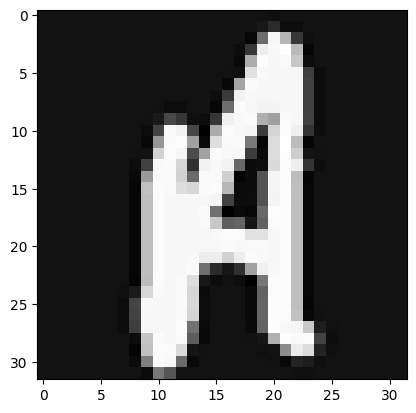

In [54]:
train_data = scipy.io.loadmat('./data/nist36_train.mat')
valid_data = scipy.io.loadmat('./data/nist36_valid.mat')
test_data = scipy.io.loadmat('./data/nist36_test.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']
test_x, test_y = test_data['test_data'], test_data['test_labels']

if True: # view the data
    for crop in train_x:
        plt.imshow(crop.reshape(32,32).T, cmap="Greys")
        plt.show()
        break

In [64]:
############################## Q 3.1 ##############################
max_iters = 50
# pick a batch size, learning rate
batch_size = 8
learning_rate = 2.5e-3
hidden_size = 64
##########################
##### your code here #####
##########################
np.random.seed(42)
random.seed(42)

batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)

params = {}

# initialize layers
initialize_weights(train_x.shape[1], hidden_size, params, "layer1")
initialize_weights(hidden_size, train_y.shape[1], params, "output")
layer1_W_initial = np.copy(params["Wlayer1"]) # copy for Q3.3

train_loss = []
valid_loss = []
train_acc = []
valid_acc = []
for itr in range(max_iters):
    # record training and validation loss and accuracy for plotting
    h1 = forward(train_x,params,'layer1',sigmoid)
    probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(train_y, probs)
    train_loss.append(loss/train_x.shape[0])
    train_acc.append(acc)

    h1 = forward(valid_x,params,'layer1',sigmoid)
    probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(valid_y, probs)
    valid_loss.append(loss/valid_x.shape[0])
    valid_acc.append(acc)

    total_loss = 0
    avg_acc = 0
    for xb,yb in batches:
        # training loop can be exactly the same as q2!
        ##########################
        ##### your code here #####
        ##########################
        # Forward pass
        h1 = forward(xb, params, 'layer1', sigmoid)
        probs = forward(h1, params, 'output', softmax)

        # Compute loss and accuracy for this batch (optional step for debugging)
        b_loss, b_acc = compute_loss_and_acc(yb, probs)
        total_loss += b_loss
        avg_acc    += b_acc

        # Backprop for output layer
        delta1 = probs - yb  # cross-entropy derivative for softmax
        delta2 = backwards(delta1, params, name='output', activation_deriv=linear_deriv)

        # Backprop for hidden layer (using sigmoid derivative)
        backwards(delta2, params, name='layer1', activation_deriv=sigmoid_deriv)

        # Gradient update
        params['Woutput'] -= learning_rate * params['grad_Woutput']
        params['boutput'] -= learning_rate * params['grad_boutput']
        params['Wlayer1'] -= learning_rate * params['grad_Wlayer1']
        params['blayer1'] -= learning_rate * params['grad_blayer1']

    # Average the batch loss/accuracy
    total_loss /= batch_num
    avg_acc    /= batch_num

    if itr % 2 == 0:
        print("itr: {:02d}   loss: {:.2f}   acc: {:.2f}".format(itr,total_loss,avg_acc))

# record final training and validation accuracy and loss
h1 = forward(train_x,params,'layer1',sigmoid)
probs = forward(h1,params,'output',softmax)
loss, acc = compute_loss_and_acc(train_y, probs)
train_loss.append(loss/train_x.shape[0])
train_acc.append(acc)

h1 = forward(valid_x,params,'layer1',sigmoid)
probs = forward(h1,params,'output',softmax)
loss, acc = compute_loss_and_acc(valid_y, probs)
valid_loss.append(loss/valid_x.shape[0])
valid_acc.append(acc)

# report validation accuracy; aim for 75%
print('Validation accuracy: ', valid_acc[-1])

# compute and report test accuracy
h1 = forward(test_x,params,'layer1',sigmoid)
test_probs = forward(h1,params,'output',softmax)
_, test_acc = compute_loss_and_acc(test_y, test_probs)
print('Test accuracy: ', test_acc)

itr: 00   loss: 3.50   acc: 0.05
itr: 02   loss: 2.73   acc: 0.37
itr: 04   loss: 2.01   acc: 0.55
itr: 06   loss: 1.67   acc: 0.63
itr: 08   loss: 1.48   acc: 0.66
itr: 10   loss: 1.36   acc: 0.68
itr: 12   loss: 1.28   acc: 0.70
itr: 14   loss: 1.21   acc: 0.72
itr: 16   loss: 1.16   acc: 0.73
itr: 18   loss: 1.11   acc: 0.74
itr: 20   loss: 1.07   acc: 0.75
itr: 22   loss: 1.04   acc: 0.76
itr: 24   loss: 1.01   acc: 0.77
itr: 26   loss: 0.98   acc: 0.77
itr: 28   loss: 0.95   acc: 0.78
itr: 30   loss: 0.93   acc: 0.79
itr: 32   loss: 0.91   acc: 0.79
itr: 34   loss: 0.89   acc: 0.80
itr: 36   loss: 0.87   acc: 0.80
itr: 38   loss: 0.85   acc: 0.81
itr: 40   loss: 0.83   acc: 0.81
itr: 42   loss: 0.81   acc: 0.82
itr: 44   loss: 0.80   acc: 0.82
itr: 46   loss: 0.78   acc: 0.83
itr: 48   loss: 0.77   acc: 0.83
Validation accuracy:  0.7527777777777778
Test accuracy:  0.7433333333333333


In [66]:
# save the final network
import pickle

saved_params = {k:v for k,v in params.items() if '_' not in k}
with open('./q3_weights.pickle', 'wb') as handle:
  pickle.dump(saved_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

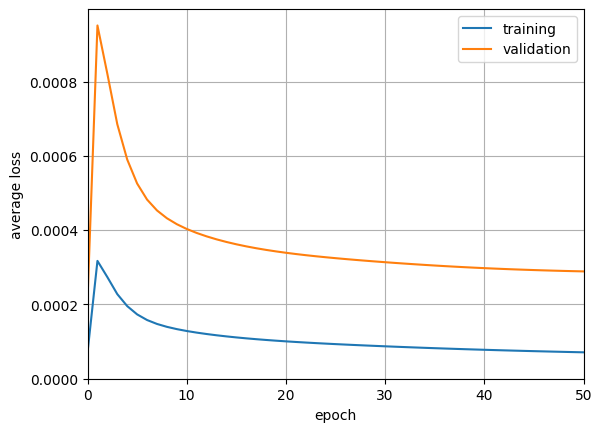

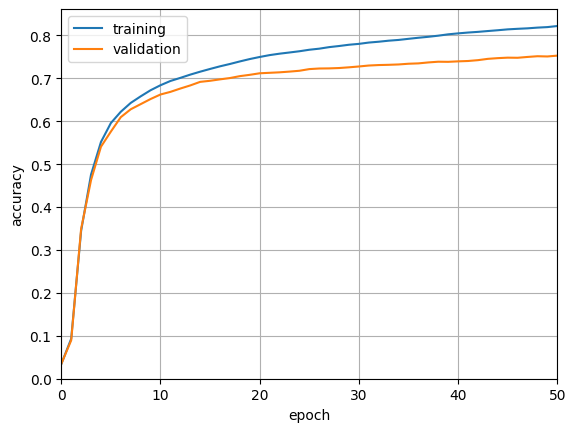

In [67]:
# plot loss curves
plt.plot(range(len(train_loss)), train_loss, label="training")
plt.plot(range(len(valid_loss)), valid_loss, label="validation")
plt.xlabel("epoch")
plt.ylabel("average loss")
plt.xlim(0, len(train_loss)-1)
plt.ylim(0, None)
plt.legend()
plt.grid()
plt.show()

# plot accuracy curves
plt.plot(range(len(train_acc)), train_acc, label="training")
plt.plot(range(len(valid_acc)), valid_acc, label="validation")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim(0, len(train_acc)-1)
plt.ylim(0, None)
plt.legend()
plt.grid()
plt.show()

## Q3.2 (3 points)

The provided code will visualize the first layer weights as 64 32x32 images, both immediately after initialization and after full training. Generate both visualizations. Comment on the learned weights and compare them to the initialized weights. Do you notice any patterns?

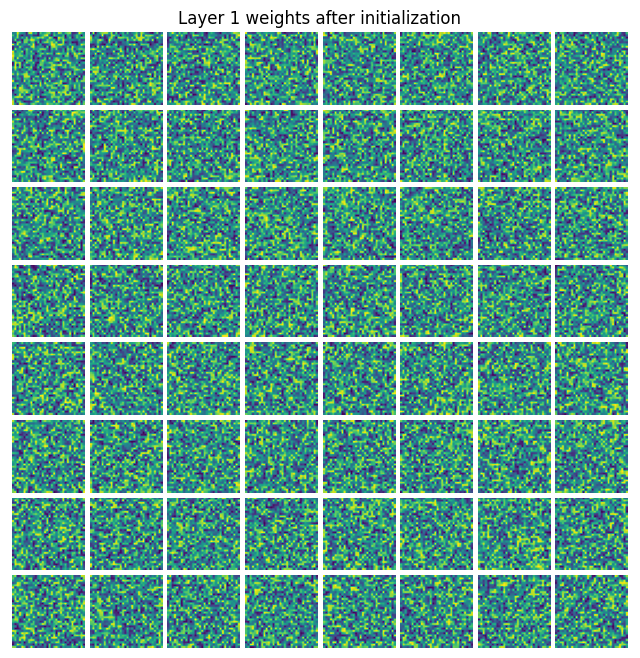

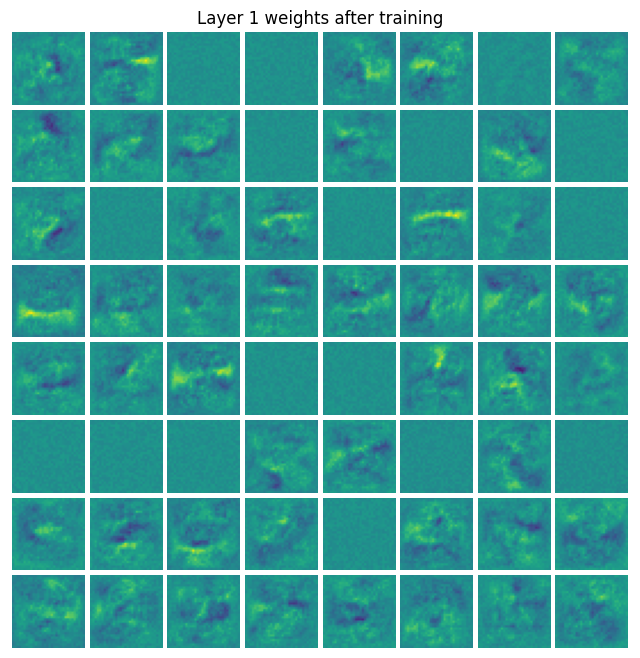

In [68]:
############################## Q 3.2 ##############################
# visualize weights
fig = plt.figure(figsize=(8,8))
plt.title("Layer 1 weights after initialization")
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(8, 8), axes_pad=0.05)
for i, ax in enumerate(grid):
    ax.imshow(layer1_W_initial[:,i].reshape((32, 32)).T)
    ax.set_axis_off()
plt.show()

v = np.max(np.abs(params['Wlayer1']))
fig = plt.figure(figsize=(8,8))
plt.title("Layer 1 weights after training")
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(8, 8), axes_pad=0.05)
for i, ax in enumerate(grid):
    ax.imshow(params['Wlayer1'][:,i].reshape((32, 32)).T, vmin=-v, vmax=v)
    ax.set_axis_off()
plt.show()

---

Before training, the Xavier initialization clearly worked because it just looks like static aka a normal uniform random spread.

After training though, you can clearly see feature representations. Given the visualized training data, I'm guessing these are detecting meaningful edges and pixel gradient transitions. As you can see in the heatmap look above, there are some collections of edges and pixel gradient transitions that are more meaningful than others.

---

## Q3.3 (3 points)

Use the code in Q3.1 to train and generate accuracy and loss plots for each of these three networks:

(1) one with $10$ times your tuned learning rate,
    
(2) one with one-tenth your tuned learning rate, and

(3) one with your tuned learning rate.
    
Include total of six plots (two will be the same from Q3.1). Comment on how the learning rates affect the training, and report the final accuracy of the best network on the test set. Hint: Use fixed random seeds to improve reproducibility.

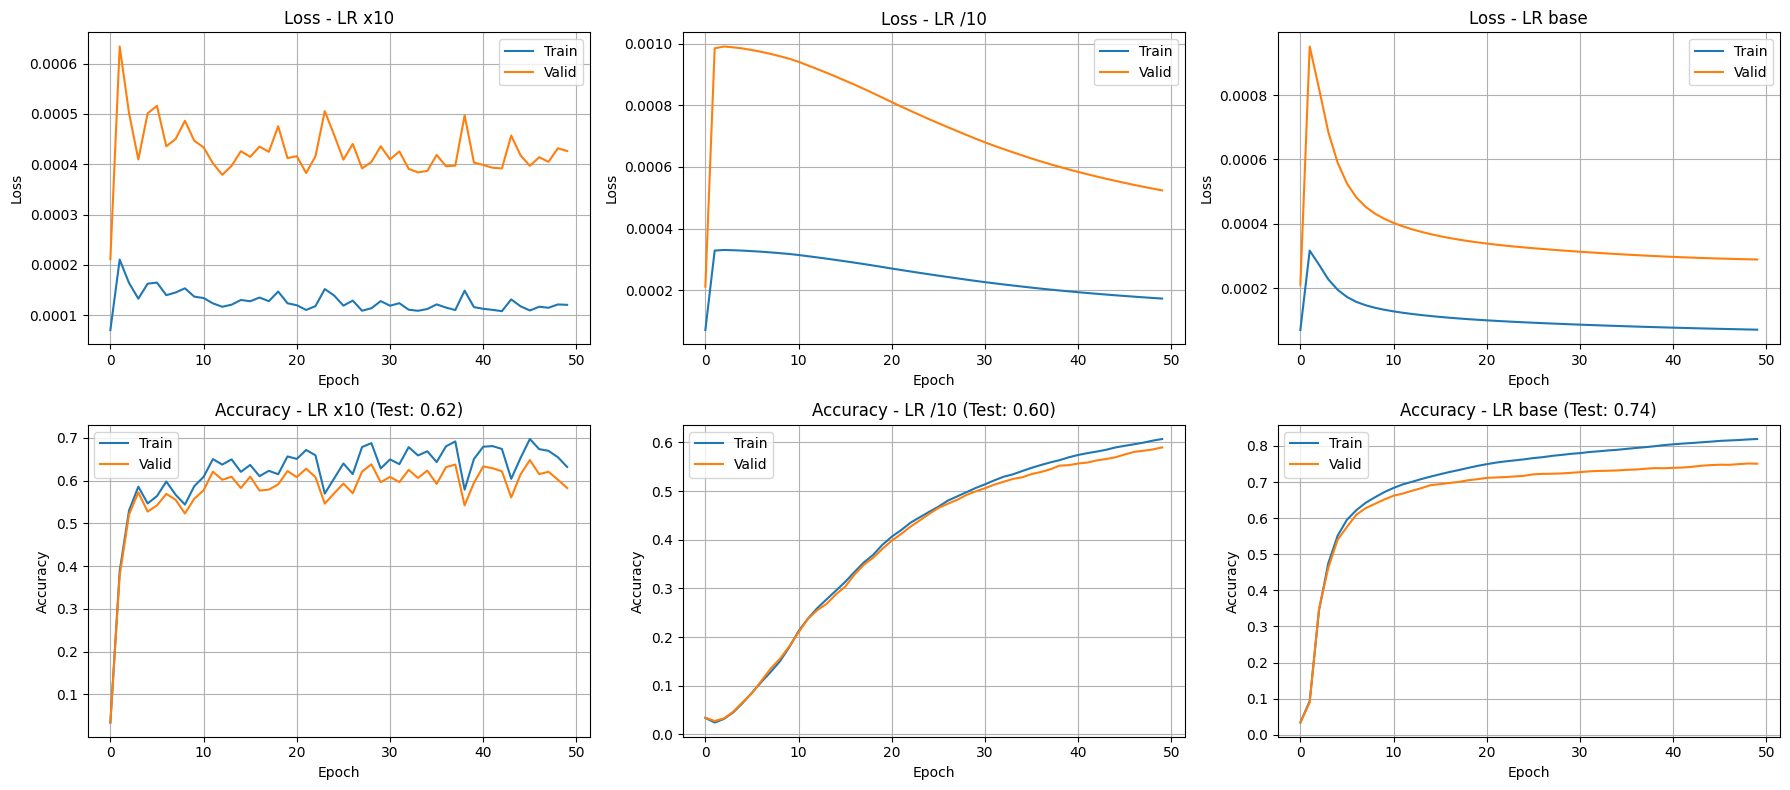

In [69]:
############################## Q 3.3 ##############################
##########################
##### your code here #####
##########################

def train_model(learning_rate, label):
    np.random.seed(42)
    random.seed(42)

    max_iters = 50
    batch_size = 8
    hidden_size = 64
    batches = get_random_batches(train_x, train_y, batch_size)

    params = {}
    initialize_weights(train_x.shape[1], hidden_size, params, "layer1")
    initialize_weights(hidden_size, train_y.shape[1], params, "output")

    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []

    for itr in range(max_iters):
        h1 = forward(train_x, params, 'layer1', sigmoid)
        probs = forward(h1, params, 'output', softmax)
        loss, acc = compute_loss_and_acc(train_y, probs)
        train_loss.append(loss / train_x.shape[0])
        train_acc.append(acc)

        h1 = forward(valid_x, params, 'layer1', sigmoid)
        probs = forward(h1, params, 'output', softmax)
        loss, acc = compute_loss_and_acc(valid_y, probs)
        valid_loss.append(loss / valid_x.shape[0])
        valid_acc.append(acc)

        total_loss = 0
        avg_acc = 0
        for xb, yb in batches:
            h1 = forward(xb, params, 'layer1', sigmoid)
            probs = forward(h1, params, 'output', softmax)

            b_loss, b_acc = compute_loss_and_acc(yb, probs)
            total_loss += b_loss
            avg_acc += b_acc

            delta1 = probs - yb
            delta2 = backwards(delta1, params, name='output', activation_deriv=linear_deriv)
            backwards(delta2, params, name='layer1', activation_deriv=sigmoid_deriv)

            params['Woutput'] -= learning_rate * params['grad_Woutput']
            params['boutput'] -= learning_rate * params['grad_boutput']
            params['Wlayer1'] -= learning_rate * params['grad_Wlayer1']
            params['blayer1'] -= learning_rate * params['grad_blayer1']

    # Evaluate test accuracy
    h1 = forward(test_x, params, 'layer1', sigmoid)
    test_probs = forward(h1, params, 'output', softmax)
    _, test_acc = compute_loss_and_acc(test_y, test_probs)

    return train_loss, valid_loss, train_acc, valid_acc, test_acc, label

# Run experiments
lr_base = 2.5e-3
results = [
    train_model(lr_base * 10, 'LR x10'),
    train_model(lr_base / 10, 'LR /10'),
    train_model(lr_base, 'LR base'),
]

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
for idx, (train_loss, valid_loss, train_acc, valid_acc, test_acc, label) in enumerate(results):
    axes[0, idx].plot(train_loss, label='Train')
    axes[0, idx].plot(valid_loss, label='Valid')
    axes[0, idx].set_title(f'Loss - {label}')
    axes[0, idx].set_xlabel('Epoch')
    axes[0, idx].set_ylabel('Loss')
    axes[0, idx].legend()
    axes[0, idx].grid(True)

    axes[1, idx].plot(train_acc, label='Train')
    axes[1, idx].plot(valid_acc, label='Valid')
    axes[1, idx].set_title(f'Accuracy - {label} (Test: {test_acc:.2f})')
    axes[1, idx].set_xlabel('Epoch')
    axes[1, idx].set_ylabel('Accuracy')
    axes[1, idx].legend()
    axes[1, idx].grid(True)

plt.tight_layout()
plt.show()

---

The best set was naturally the tuned learning rate.

The x10 LR suffered from being too large and oscillated back and forth without being able to track down to the global minimum while the /10 LR had the opposite problem of simply not being able to traverse fast enough.

---

## Q3.4 (3 points)

Compute and visualize the confusion matrix of the test data for your best model. Comment on the top few pairs of classes that are most commonly confused.

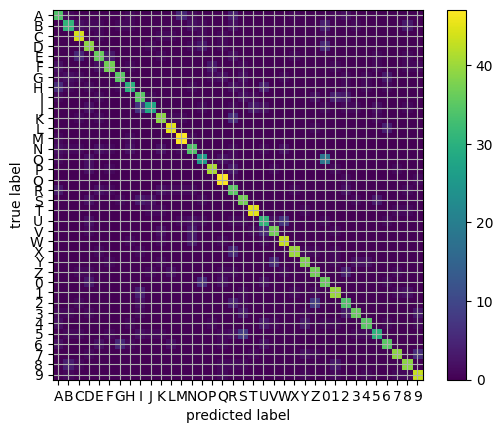

In [70]:
############################## Q 3.4 ##############################
confusion_matrix = np.zeros((train_y.shape[1],train_y.shape[1]))

# compute confusion matrix
##########################
##### your code here #####
##########################
num_classes = train_y.shape[1]
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Get predictions from best model
h1 = forward(test_x, params, 'layer1', sigmoid)
probs = forward(h1, params, 'output', softmax)

# Convert predictions and true labels to class indices
y_pred = np.argmax(probs, axis=1)
y_true = np.argmax(test_y, axis=1)

# Populate confusion matrix
for true, pred in zip(y_true, y_pred):
    confusion_matrix[true, pred] += 1

# visualize confusion matrix
import string
plt.imshow(confusion_matrix,interpolation='nearest')
plt.grid()
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
plt.show()

---

O and 0, 2 and Z, and 5 and S seem to be the most confused pairs which makes sense as they're clearly very similar to each other. I would have expected U and V or N and M to have high classification problems though. It's interesting to see the numbers being confused with the letters

---

# Q4 Image Compression with Autoencoders

An autoencoder is a neural network that is trained to attempt to copy its input to its output, but it usually allows copying only approximately. This is typically achieved by restricting the number of hidden nodes inside the autoencoder; in other words, the autoencoder would be forced to learn to represent data with this limited number of hidden nodes. This is a useful way of learning compressed representations.

In this section, we will continue using the NIST36 dataset you have from the previous questions.

## Q4.1 Building the Autoencoder

### Q4.1 (4 points)

Due to the difficulty in training auto-encoders, we have to move to the $relu(x) = max(x,0)$ activation function. It is provided for you. We will build an autoencoder with the layers listed below. Initialize the layers with the initialize_weights() function you wrote in Q2.1.2.

- 1024 to 32 dimensions, followed by a ReLU
- 32 to 32 dimensions, followed by a ReLU
- 32 to 32 dimensions, followed by a ReLU
- 32 to 1024 dimensions, followed by a sigmoid (this normalizes the image output for us)

In [99]:
# here we provide the relu activation and its derivative for you
from collections import Counter

def relu(x):
    return np.maximum(x,0)

def relu_deriv(x):
    return (x > 0).astype(float)

############################## Q 4.1 ##############################
params = Counter()

# initialize layers here
##########################
##### your code here #####
##########################

initialize_weights(1024, 32,  params, "layer1")   # 1024 -> 32
initialize_weights(32,   32,  params, "layer2")   # 32   -> 32
initialize_weights(32,   32,  params, "layer3")   # 32   -> 32
initialize_weights(32,  1024, params, "output")   # 32   -> 1024

## Q4.2 Training the Autoencoder

### Q4.2.1 (5 points)

To help even more with convergence speed, we will implement momentum. Now, instead of updating $W = W - \alpha \frac{\partial J}{\partial W}$, we will use the update rules $M_W = 0.9 M_W - \alpha \frac{\partial J}{\partial W}$ and $W = W + M_W$. To implement momentum, populate the parameters dictionary with zero-initialized momentum accumulators M, one for each parameter. Then simply perform both update equations for every batch.

### Q4.2.2 (6 points)

Using the provided default settings, train the network for 100 epochs. The loss function that you will use is the total squared error for the output image compared to the input image (they should be the same!). Plot the training loss curve. What do you observe?

/tmp/ipykernel_18046/2940261083.py:12: RuntimeWarning: overflow encountered in exp
  res = 1.0 / (1.0 + np.exp(-x))


itr: 00 	 loss: 797270.58
itr: 02 	 loss: 797245.36
itr: 04 	 loss: 797249.78
itr: 06 	 loss: 797248.86
itr: 08 	 loss: 797247.43
itr: 10 	 loss: 797251.25
itr: 12 	 loss: 797257.35
itr: 14 	 loss: 797252.23
itr: 16 	 loss: 797249.56
itr: 18 	 loss: 797253.95
itr: 20 	 loss: 797240.48
itr: 22 	 loss: 797233.31
itr: 24 	 loss: 797231.98
itr: 26 	 loss: 797229.76
itr: 28 	 loss: 797228.65
itr: 30 	 loss: 797225.70
itr: 32 	 loss: 797222.35
itr: 34 	 loss: 797227.68
itr: 36 	 loss: 797227.87
itr: 38 	 loss: 797232.23
itr: 40 	 loss: 797221.78
itr: 42 	 loss: 797217.49
itr: 44 	 loss: 797218.60
itr: 46 	 loss: 797218.35
itr: 48 	 loss: 797235.34
itr: 50 	 loss: 797240.65
itr: 52 	 loss: 797240.24
itr: 54 	 loss: 797238.05
itr: 56 	 loss: 797237.48
itr: 58 	 loss: 797235.06
itr: 60 	 loss: 797231.47
itr: 62 	 loss: 797230.70
itr: 64 	 loss: 797231.66
itr: 66 	 loss: 797229.93
itr: 68 	 loss: 797229.08
itr: 70 	 loss: 797231.06
itr: 72 	 loss: 797237.15
itr: 74 	 loss: 797238.33
itr: 76 	 lo

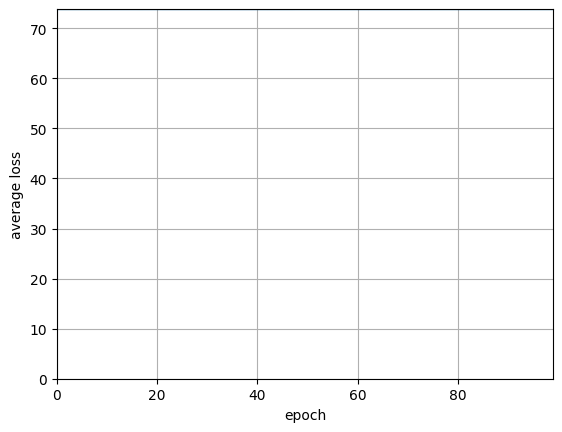

In [112]:
########################### Q 4.2.1 & Q 4.2.2 ########################
# the NIST36 dataset
train_data = scipy.io.loadmat('./data/nist36_train.mat')
valid_data = scipy.io.loadmat('./data/nist36_valid.mat')

# we don't need labels now!
train_x = train_data['train_data']
valid_x = valid_data['valid_data']

max_iters = 100
# pick a batch size, learning rate
batch_size = 32
learning_rate =  1e-5
hidden_size = 32
lr_rate = 20
batches = get_random_batches(train_x,np.ones((train_x.shape[0],1)),batch_size)
batch_num = len(batches)
total_loss = 0
# should look like your previous training loops
losses = []
for itr in range(max_iters):
    total_loss = 0
    for xb,_ in batches:
        # training loop can be exactly the same as q2!
        # your loss is now the total squared error, i.e. the sum of (x-y)^2
        # delta is the d/dx of (x-y)^2
        # to implement momentum
        #   just use 'M_'+name variables as momentum accumulators to keep a saved value over steps
        #   params is a Counter(), which returns a 0 if an element is missing
        #   so you should be able to write your loop without any special conditions

        ##########################
        ##### your code here #####
        ##########################
        # Forward pass (4 layers)
        h1 = forward(xb, params, 'layer1', sigmoid)
        h2 = forward(h1, params, 'layer2', relu)
        h3 = forward(h2, params, 'layer3', relu)
        out = forward(h3, params, 'output', relu)

        # Squared error loss 
        # sum of (out - xb)^2 over all examples
        b_loss = np.sum((out - xb)**2)
        total_loss += b_loss

        # Backward pass (reverse order)
        # derivative of sum of squares wrt output is 2*(out - xb)
        delta = 2*(out - xb)

        # output layer
        delta = backwards(delta, params, 'output', activation_deriv=sigmoid_deriv)
        # layer3
        delta = backwards(delta, params, 'layer3', activation_deriv=relu_deriv)
        # layer2
        delta = backwards(delta, params, 'layer2', activation_deriv=relu_deriv)
        # layer1
        delta = backwards(delta, params, 'layer1', activation_deriv=relu_deriv)

        # Momentum update for each W & b
        for name_layer in ['layer1','layer2','layer3','output']:
            for var in ['W','b']:
                # get current gradient
                grad_key = 'grad_'+var+name_layer
                # momentum accumulator key
                m_key = 'M_'+var+name_layer

                # compute momentum step
                # M_W <- 0.9 M_W - alpha * grad_W
                params[m_key] = 0.9 * params[m_key] - learning_rate * params[grad_key]
                # W <- W + M_W
                params[var+name_layer] += params[m_key]

    losses.append(total_loss/train_x.shape[0])
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f}".format(itr,total_loss))
    if itr % lr_rate == lr_rate-1:
        learning_rate *= 0.8

# plot loss curve
plt.plot(range(len(losses)), losses)
plt.xlabel("epoch")
plt.ylabel("average loss")
plt.xlim(0, len(losses)-1)
plt.ylim(0, None)
plt.grid()
plt.show()

---

I want to point out that I tried learning rates as high as e-2 and as low as e-6, multple LRs and batch sizes from 8 to 64, and I couldn't get the loss down which is roughly what it was when I downloaded it. Originally, I also reinitialized the weights every time which I believe I was supposed to do, but eventually I stopped because essentially it's just a more intuitive way to initialize the weights intelligently while learning from the oscillations of the learning curve by observing the outputs to help tune the iterations every 100 iterations. Strangely, this could be helping to either train faster as the larger learning rates clearly did not make progress while the smaller ones did though just incredibly slow. And I eventually hit a plateau. Upping the size from 32 to 64 didn't help either.

But ultimately, we observe an initial quick drop in my first iteration, and the we can see the learning rate begin to plateauing until the learning rate drops implying that the lr scheduler could have continued dropping the learning rate faster or more often as you see in the outputs because it's nearly impossible to tell in the graph.

---

## Q4.3 Evaluating the Autoencoder

### Q4.3.1 (5 points)

Now let's evaluate how well the autoencoder has been trained. Select 5 classes from the total 36 classes in the validation set and for each selected class show 2 validation images and their reconstruction. What differences do you observe in the reconstructed validation images compared to the original ones?

/tmp/ipykernel_18046/2940261083.py:12: RuntimeWarning: overflow encountered in exp
  res = 1.0 / (1.0 + np.exp(-x))


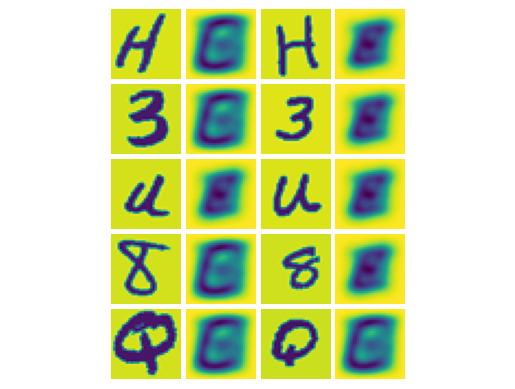

In [113]:
############################## Q 4.3.1 ##############################
# choose 5 classes (change if you want)
visualize_labels = ["H", "3", "U", "8", "Q"]

# get 2 validation images from each label to visualize
visualize_x = np.zeros((2*len(visualize_labels), valid_x.shape[1]))
for i, label in enumerate(visualize_labels):
    idx = 26+int(label) if label.isnumeric() else string.ascii_lowercase.index(label.lower())
    choices = np.random.choice(np.arange(100*idx, 100*(idx+1)), 2, replace=False)
    visualize_x[2*i:2*i+2] = valid_x[choices]

# run visualize_x through your network
# using the forward() function you wrote in Q2.2.1
reconstructed_x = visualize_x
# TODO: name the output reconstructed_x
##########################
##### your code here #####
##########################
h1 = forward(visualize_x, params, 'layer1', relu)
h2 = forward(h1, params, 'layer2', relu)
h3 = forward(h2, params, 'layer3', relu)
reconstructed_x = forward(h3, params, 'output', sigmoid)

# visualize
fig = plt.figure()
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(len(visualize_labels), 4), axes_pad=0.05)
for i, ax in enumerate(grid):
    if i % 2 == 0:
        ax.imshow(visualize_x[i//2].reshape((32, 32)).T)
    else:
        ax.imshow(reconstructed_x[i//2].reshape((32, 32)).T)
    ax.set_axis_off()
plt.show()

---

Nothing sadly because my autoencoder sucks as I stated above despite my multple multiple iterations of training, but you can see an E looking shape which would imply to me that it would be useful to a good bit of the selected in a contrastive learning approach as a pretrained encoder. Additionally, it seems to at least be able to get the sizing right.

---

### Q4.3.2 (5 points)

Let’s evaluate the reconstruction quality using Peak Signal-to-noise Ratio (PSNR). PSNR is defined as

$$\text{PSNR} = 20 \times \log_{10}(\text{MAX}_I) - 10\times \log_{10}(\text{MSE})$$

where $\text{MAX}_I$ is the maximum possible pixel value of the image, and $\text{MSE}$ (mean squared error) is computed across all pixels. Said another way, maximum refers to the brightest overall sum (maximum positive value of the sum). You may use skimage.metrics.peak_signal_noise_ratio for convenience. Report the average PSNR you get from the autoencoder across all images in the validation set (it should be around 15).

In [114]:
############################## Q 4.3.2 ##############################
from skimage.metrics import peak_signal_noise_ratio
# evaluate PSNR
##########################
##### your code here #####
##########################

# 1) Forward pass on all validation images
h1 = forward(valid_x, params, 'layer1', relu)
h2 = forward(h1, params, 'layer2', relu)
h3 = forward(h2, params, 'layer3', relu)
recon_valid = forward(h3, params, 'output', sigmoid)

# 2) Compute PSNR on each validation image, then average
psnr_sum = 0.0
for i in range(valid_x.shape[0]):
    # For normalized data in [0,1], data_range=1.0
    psnr_sum += peak_signal_noise_ratio(valid_x[i], recon_valid[i], data_range=1.0)

avg_psnr = psnr_sum / valid_x.shape[0]
print("Average PSNR on validation set: {:.2f}".format(avg_psnr))


/tmp/ipykernel_18046/2940261083.py:12: RuntimeWarning: overflow encountered in exp
  res = 1.0 / (1.0 + np.exp(-x))


Average PSNR on validation set: 11.50


---

11.5

---

# Q5 (Extra Credit) Extract Text from Images

Run below code to download and put the unzipped data in '/content/images' folder. We have provided you with 01_list.jpg, 02_letters.jpg, 03_haiku.jpg and 04_deep.jpg to test your implementation on.

In [ ]:
if not os.path.exists('/content/images'):
  os.mkdir('/content/images')
  !wget http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip -O /content/images/images.zip
  !unzip "/content/images/images.zip" -d "/content/images"
  os.system("rm /content/images/images.zip")

In [ ]:
ls /content/images

01_list.jpg*  02_letters.jpg*  03_haiku.jpg*  04_deep.jpg*


## Q5.1 (Extra Credit) (4 points)

The method outlined above is pretty simplistic, and while it works for the given text samples, it makes several assumptions. What are two big assumptions that the sample method makes?

---

YOUR ANSWER HERE...

---


## Q5.2 (Extra Credit) (10 points)

Implement the findLetters() function to find letters in the image. Given an RGB image, this function should return bounding boxes for all of the located handwritten characters in the image, as well as a binary black-and-white version of the image im. Each row of the matrix should contain [y1,x1,y2,x2], the positions of the top-left and bottom-right corners of the box. The black-and-white image should be between 0.0 to 1.0, with the characters in white and the background in black (consistent with the images in nist36). Hint: Since we read text left to right, top to bottom, we can use this to cluster the coordinates.

In [ ]:
############################## Q 5.2 ##############################
def findLetters(image):
    """
    takes a color image
    returns a list of bounding boxes and black_and_white image
    """
    bboxes = []
    bw = None
    # insert processing in here
    # one idea estimate noise -> denoise -> greyscale -> threshold -> morphology -> label -> skip small boxes
    # this can be 10 to 15 lines of code using skimage functions

    ##########################
    ##### your code here #####
    ##########################


    return bboxes, bw

## Q5.3 (Extra Credit) (3 points)

Using the provided code below, visualize all of the located boxes on top of the binary image to show the accuracy of your findLetters() function. Include all the provided sample images with the boxes.


01_list.jpg


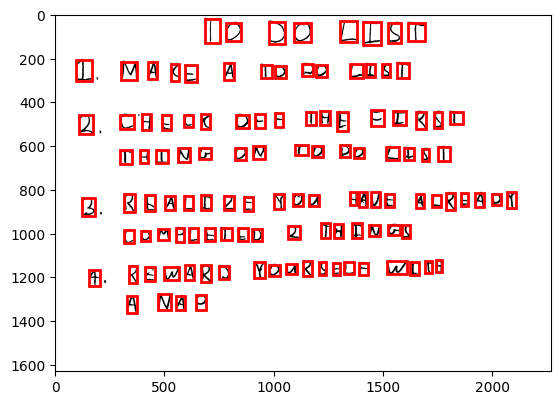


02_letters.jpg


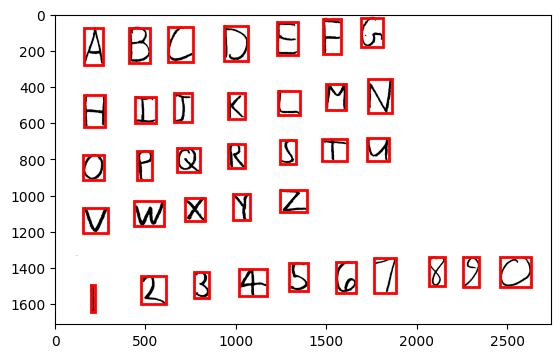


03_haiku.jpg


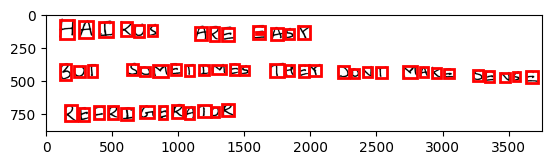


04_deep.jpg


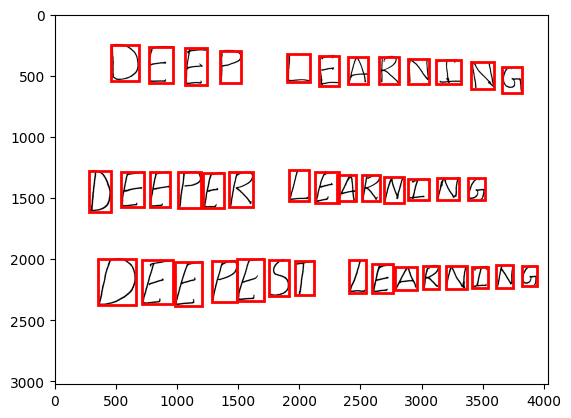

In [ ]:
############################## Q 5.3 ##############################
# do not include any more libraries here!
# no opencv, no sklearn, etc!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

for imgno, img in enumerate(sorted(os.listdir('/content/images'))):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('/content/images',img)))
    bboxes, bw = findLetters(im1)

    print('\n' + img)
    plt.imshow(1-bw, cmap="Greys") # reverse the colors of the characters and the background for better visualization
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()

## Q5.4 (Extra Credit) (8 points)

You will now load the image, find the character locations, classify each one with the network you trained in Q3.1, and return the text contained in the image. Be sure you try to make your detected images look like the images from the training set. Visualize them and act accordingly. If you find that your classifier performs poorly, consider dilation under skimage morphology to make the letters thicker.

Your solution is correct if you can correctly detect most of the letters and classify approximately 70\% of the letters in each of the sample images.

Run your code on all the provided sample images in '/content/images'. Show the extracted text. It is fine if your code ignores spaces, but if so, please provide a written answer with manually added spaces.

In [ ]:
############################## Q 5.4 ##############################
for imgno, img in enumerate(sorted(os.listdir('/content/images'))):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('/content/images',img)))
    bboxes, bw = findLetters(im1)
    print('\n' + img)

    # find the rows using..RANSAC, counting, clustering, etc.
    ##########################
    ##### your code here #####
    ##########################



    # crop the bounding boxes
    # note.. before you flatten, transpose the image (that's how the dataset is!)
    # consider doing a square crop, and even using np.pad() to get your images looking more like the dataset
    ##########################
    ##### your code here #####
    ##########################



    # load the weights
    # run the crops through your neural network and print them out
    import pickle
    import string
    letters = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
    params = pickle.load(open('/content/q3_weights.pickle','rb'))
    ##########################
    ##### your code here #####
    ##########################



---

YOUR ANSWER HERE... (if your code ignores spaces)

---